In [250]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE
import scikitplot as skplt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
df = pd.read_csv('Results_logatomes_avec_erreurs_phono.csv' , sep=';' , header=None)

In [48]:
df_new = pd.read_csv('df_new.csv' , sep=',' , header=None)

/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,4,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,NaN,id_audiogramme,phoneme_cible,phoneme_reconnu,phoneme_correct,erreurs_phono,category1,category2,category3,category4,...,-anterieur,-arriere,-continu,-coronal,-haut,-nasal,-sonant,-voise,frequence,threshold
1,0.0,1,Z,b,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,...,0,0,1,1,1,0,0,0,125,0
2,1.0,1,m,n,0,+coronal,+coronal,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,125,0
3,2.0,1,S,p,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,...,0,0,1,1,1,0,0,0,125,0
4,3.0,1,d,b,0,-coronal,-coronal,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102428,102427.0,998,l,S,0,-sonant#-voise#+haut#-anterieur,-sonant,-voise,+haut,-anterieur,...,1,0,0,0,0,0,1,1,10000,15
102429,102428.0,998,k,S,0,+continu#+coronal#-arriere,+continu,+coronal,-arriere,NaN,...,0,1,0,0,0,0,0,0,10000,15
102430,102429.0,998,n,f,0,-sonant#-voise#-coronal#-nasal,-sonant,-voise,-coronal,-nasal,...,0,0,0,1,0,1,1,1,10000,15
102431,102430.0,998,p,f,0,+continu,+continu,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,10000,15


In [251]:
freq=pd.read_csv('freq.csv' , sep=',' , header=None)

In [36]:
pourcentage=pd.read_csv('pourcentage.csv' , sep=',' , header=None)

In [253]:
freq.columns = freq.iloc[0]
freq=pd.DataFrame(freq)
freq=freq.drop(freq.index[0])
freq

,trait,error,0
1,-voise,bp,3792
2,-voise,ZS,3516
3,-voise,bf,3276
4,+continu,bf,3276
5,+continu,pf,3180
...,...,...,...
492,-haut,gm,12
493,-haut,Zd,12
494,+continu,kn,12
495,-sonant,mg,12


In [81]:
df

,id_audiogramme,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,...,phoneme_correct,erreurs_phono,category1,category2,category3,category4,category5,category6,category7,category8
2,1,0,0,0,20,30,50,65,75,80,...,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,,,,
3,1,0,0,0,20,30,50,65,75,80,...,0,+coronal,+coronal,,,,,,,
4,1,0,0,0,20,30,50,65,75,80,...,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,,,,
6,1,0,0,0,20,30,50,65,75,80,...,0,-coronal,-coronal,,,,,,,
7,1,0,0,0,20,30,50,65,75,80,...,0,-continu,-continu,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,998,90,90,90,90,65,45,30,45,20,...,0,-sonant#-voise#+haut#-anterieur,-sonant,-voise,+haut,-anterieur,,,,
11973,998,90,90,90,90,65,45,30,45,20,...,0,+continu#+coronal#-arriere,+continu,+coronal,-arriere,,,,,
11974,998,90,90,90,90,65,45,30,45,20,...,0,-sonant#-voise#-coronal#-nasal,-sonant,-voise,-coronal,-nasal,,,,
11975,998,90,90,90,90,65,45,30,45,20,...,0,+continu,+continu,,,,,,,


In [7]:
df.columns = df.iloc[0]
df=pd.DataFrame(df)
df=df.drop(df.index[0])
df

,id_audiogramme,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,seuil_6000,seuil_8000,seuil_10000,phoneme_cible,phoneme_reconnu,phoneme_correct,erreurs_phono
1,1,0,0,0,20,30,50,65,75,80,85,60,40,b,b,1,NaN
2,1,0,0,0,20,30,50,65,75,80,85,60,40,Z,b,0,[-continu#-coronal#-haut#+anterieur]
3,1,0,0,0,20,30,50,65,75,80,85,60,40,m,n,0,[+coronal]
4,1,0,0,0,20,30,50,65,75,80,85,60,40,S,p,0,[-continu#-coronal#-haut#+anterieur]
5,1,0,0,0,20,30,50,65,75,80,85,60,40,g,g,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,998,90,90,90,90,65,45,30,45,20,30,20,15,l,S,0,[-sonant#-voise#+haut#-anterieur]
11973,998,90,90,90,90,65,45,30,45,20,30,20,15,k,S,0,[+continu#+coronal#-arriere]
11974,998,90,90,90,90,65,45,30,45,20,30,20,15,n,f,0,[-sonant#-voise#-coronal#-nasal]
11975,998,90,90,90,90,65,45,30,45,20,30,20,15,p,f,0,[+continu]


In [37]:
pourcentage.columns = pourcentage.iloc[0]
pourcentage=pd.DataFrame(pourcentage)
pourcentage=pourcentage.drop(pourcentage.index[0])
pourcentage

,id_audiogramme,phoneme_correct,0.0
1,1,0,75.000000
2,1,1,25.000000
3,10,0,41.666667
4,10,1,58.333333
5,100,0,16.666667
...,...,...,...
1867,996,0,100.000000
1868,997,0,83.333333
1869,997,1,16.666667
1870,998,0,83.333333


In [267]:
df.to_csv('df.csv') 

In [276]:
DF.to_csv('DF1.csv') 

In [83]:
result.to_csv('result.csv') 

In [332]:
a.to_csv('percent.csv') 

In [130]:
df_new.to_csv('df_new.csv') 

In [171]:
freq.to_csv('freq.csv') 

In [35]:
pourcentage.to_csv('pourcentage.csv') 

In [244]:
new.to_csv('final.csv') 

In [243]:
df_join.to_csv('df_join.csv') 

In [56]:
df.dtypes

0
id_audiogramme     object
seuil_125          object
seuil_250          object
seuil_500          object
seuil_750          object
seuil_1000         object
seuil_1500         object
seuil_2000         object
seuil_3000         object
seuil_4000         object
seuil_6000         object
seuil_8000         object
seuil_10000        object
phoneme_cible      object
phoneme_reconnu    object
phoneme_correct    object
erreurs_phono      object
dtype: object

In [57]:
df[["seuil_125","seuil_250","seuil_500","seuil_750","seuil_1000","seuil_1500","seuil_2000",
    "seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000",
    "phoneme_correct"]] = df[["seuil_125","seuil_250","seuil_500","seuil_750","seuil_1000","seuil_1500","seuil_2000",
    "seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000",
    "phoneme_correct"]].apply(pd.to_numeric)

In [58]:
df[["seuil_125","seuil_250","seuil_500","seuil_750","seuil_1000","seuil_1500","seuil_2000",
    "seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000",
    "phoneme_correct",'-voise', '+voise', '-continu',
       '+continu', '-coronal', '+coronal', '-sonant', '+sonant', '-nasal',
       '+nasal', '-haut', '+haut', '-anterieur', '+anterieur', '-arriere',
       '+arriere']] = df[["seuil_125","seuil_250","seuil_500","seuil_750","seuil_1000","seuil_1500","seuil_2000",
    "seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000",
    "phoneme_correct",'-voise', '+voise', '-continu',
       '+continu', '-coronal', '+coronal', '-sonant', '+sonant', '-nasal',
       '+nasal', '-haut', '+haut', '-anterieur', '+anterieur', '-arriere',
       '+arriere']].apply(pd.to_numeric)

KeyError: "['+continu', '-continu', '+nasal', '-anterieur', '+sonant', '-sonant', '+voise', '+haut', '-arriere', '-coronal', '+anterieur', '-haut', '-nasal', '+arriere', '+coronal', '-voise'] not in index"

In [74]:
df.erreurs_phono.value_counts()

[-voise]                                                               1062
[+continu]                                                              447
[+continu#-haut#-arriere#+anterieur]                                    317
[+continu#-voise]                                                       275
[-coronal#-haut#+anterieur]                                             261
                                                                       ... 
[-sonant#-continu]                                                        1
[-sonant#-continu#-nasal#+haut#+arriere#-anterieur]                       1
[+sonant#+continu#+coronal]                                               1
[+sonant#+continu#+voise#+coronal#+nasal#-haut#-arriere#+anterieur]       1
[+sonant#+continu#+nasal#-haut#-arriere#+anterieur]                       1
Name: erreurs_phono, Length: 113, dtype: int64

In [59]:
df["erreurs_phono"] = df.erreurs_phono.str.replace(']','')
df["erreurs_phono"] = df.erreurs_phono.str.replace('[','')

/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [60]:
df[['category1','category2','category3','category4','category5','category6','category7','category8']]=df.erreurs_phono.str.split("#",expand=True,)

In [63]:
df

,id_audiogramme,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,...,phoneme_correct,erreurs_phono,category1,category2,category3,category4,category5,category6,category7,category8
2,1,0,0,0,20,30,50,65,75,80,...,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,None,None,None,None
3,1,0,0,0,20,30,50,65,75,80,...,0,+coronal,+coronal,None,None,None,None,None,None,None
4,1,0,0,0,20,30,50,65,75,80,...,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,None,None,None,None
6,1,0,0,0,20,30,50,65,75,80,...,0,-coronal,-coronal,None,None,None,None,None,None,None
7,1,0,0,0,20,30,50,65,75,80,...,0,-continu,-continu,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,998,90,90,90,90,65,45,30,45,20,...,0,-sonant#-voise#+haut#-anterieur,-sonant,-voise,+haut,-anterieur,None,None,None,None
11973,998,90,90,90,90,65,45,30,45,20,...,0,+continu#+coronal#-arriere,+continu,+coronal,-arriere,None,None,None,None,None
11974,998,90,90,90,90,65,45,30,45,20,...,0,-sonant#-voise#-coronal#-nasal,-sonant,-voise,-coronal,-nasal,None,None,None,None
11975,998,90,90,90,90,65,45,30,45,20,...,0,+continu,+continu,None,None,None,None,None,None,None


In [62]:
df=df[df['erreurs_phono'].notna()]

In [92]:
result.phoneme_correct.value_counts()

0    8536
Name: phoneme_correct, dtype: int64

In [114]:
pd.crosstab(result['phoneme_correct'], result['+arriere'], normalize='index').mul(100)

+arriere,0,1
phoneme_correct,,
0,89.40956,10.59044


In [118]:
result = result.rename({'seuil_125': '125', 'seuil_250': '250','seuil_500': '500','seuil_750': '750','seuil_1000': '1000','seuil_1500': '1500','seuil_2000': '2000','seuil_3000': '3000'
                    ,'seuil_4000': '4000','seuil_6000': '6000','seuil_8000': '8000','seuil_10000': '10000'}, axis=1)

In [113]:
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,trait,error,category,exemple
818519,912,n,k,10.0,35,-anterieur,nk,anterieur,"-anterieur ['+haut,+continu'] (d->Z)"
327589,450,f,k,0.5,40,-anterieur,fk,anterieur,"-anterieur ['+haut,+continu'] (d->Z)"
327613,453,g,p,0.5,25,+anterieur,gp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
327612,453,S,p,0.5,25,+anterieur,Sp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
327593,451,Z,n,0.5,40,+anterieur,Zn,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
...,...,...,...,...,...,...,...,...,...
201535,684,p,v,10.0,45,+voise,pv,voise,+voise (S->Z)
253611,769,k,R,1.5,35,+voise,kR,voise,+voise (S->Z)
201534,684,n,f,10.0,45,-voise,nf,voise,-voise (Z->S)
201600,691,m,f,10.0,15,-voise,mf,voise,-voise (Z->S)


In [116]:
df_join = df_join.rename({'exemple': 'trait_phonetique','category':'categorie'}, axis=1)

In [117]:
df_join = df_join.rename({'error': 'erreur','threshold':'seuil'}, axis=1)
df_join

,id_audiogramme,pourcent,phoneme_cible,phoneme_reconnu,frequence,seuil,trait,erreur,categorie,trait_phonetique
0,1,75.000000,S,p,0.125,0,+anterieur,Sp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
1,1,75.000000,Z,b,0.125,0,+anterieur,Zb,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
2,1,75.000000,S,p,0.250,0,+anterieur,Sp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
3,1,75.000000,Z,b,0.250,0,+anterieur,Zb,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
4,1,75.000000,k,p,0.125,0,+anterieur,kp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
...,...,...,...,...,...,...,...,...,...,...
42252,998,83.333333,R,s,0.125,90,-voise,Rs,voise,-voise (Z->S)
42253,998,83.333333,l,S,0.125,90,-voise,lS,voise,-voise (Z->S)
42254,998,83.333333,g,S,0.125,90,-voise,gS,voise,-voise (Z->S)
42255,998,83.333333,n,f,0.125,90,-voise,nf,voise,-voise (Z->S)


In [120]:
df_new=result.melt(id_vars=['id_audiogramme', 'phoneme_cible',
       'phoneme_reconnu', 'phoneme_correct', 'erreurs_phono', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', '+anterieur', '+arriere', '+continu',
       '+coronal', '+haut', '+nasal', '+sonant', '+voise', '-anterieur',
       '-arriere', '-continu', '-coronal', '-haut', '-nasal', '-sonant',
       '-voise'], 
        var_name="frequence", 
        value_name="threshold")
df_new

,id_audiogramme,phoneme_cible,phoneme_reconnu,phoneme_correct,erreurs_phono,category1,category2,category3,category4,category5,...,-anterieur,-arriere,-continu,-coronal,-haut,-nasal,-sonant,-voise,frequence,threshold
0,1,Z,b,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,,...,0,0,1,1,1,0,0,0,125,0
1,1,m,n,0,+coronal,+coronal,,,,,...,0,0,0,0,0,0,0,0,125,0
2,1,S,p,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,,...,0,0,1,1,1,0,0,0,125,0
3,1,d,b,0,-coronal,-coronal,,,,,...,0,0,0,1,0,0,0,0,125,0
4,1,f,p,0,-continu,-continu,,,,,...,0,0,1,0,0,0,0,0,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102427,998,l,S,0,-sonant#-voise#+haut#-anterieur,-sonant,-voise,+haut,-anterieur,,...,1,0,0,0,0,0,1,1,10000,15
102428,998,k,S,0,+continu#+coronal#-arriere,+continu,+coronal,-arriere,,,...,0,1,0,0,0,0,0,0,10000,15
102429,998,n,f,0,-sonant#-voise#-coronal#-nasal,-sonant,-voise,-coronal,-nasal,,...,0,0,0,1,0,1,1,1,10000,15
102430,998,p,f,0,+continu,+continu,,,,,...,0,0,0,0,0,0,0,0,10000,15


In [70]:
df_new = df_new.iloc[: , 1:]

In [71]:
df_new

,id_audiogramme,phoneme_cible,phoneme_reconnu,phoneme_correct,erreurs_phono,category1,category2,category3,category4,category5,...,-anterieur,-arriere,-continu,-coronal,-haut,-nasal,-sonant,-voise,frequence,threshold
1,1,Z,b,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,NaN,...,0,0,1,1,1,0,0,0,125,0
2,1,m,n,0,+coronal,+coronal,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,125,0
3,1,S,p,0,-continu#-coronal#-haut#+anterieur,-continu,-coronal,-haut,+anterieur,NaN,...,0,0,1,1,1,0,0,0,125,0
4,1,d,b,0,-coronal,-coronal,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,125,0
5,1,f,p,0,-continu,-continu,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102428,998,l,S,0,-sonant#-voise#+haut#-anterieur,-sonant,-voise,+haut,-anterieur,NaN,...,1,0,0,0,0,0,1,1,10000,15
102429,998,k,S,0,+continu#+coronal#-arriere,+continu,+coronal,-arriere,NaN,NaN,...,0,1,0,0,0,0,0,0,10000,15
102430,998,n,f,0,-sonant#-voise#-coronal#-nasal,-sonant,-voise,-coronal,-nasal,NaN,...,0,0,0,1,0,1,1,1,10000,15
102431,998,p,f,0,+continu,+continu,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,10000,15


In [72]:
df_new1=df_new.melt(id_vars=['id_audiogramme', 'phoneme_cible',
       'phoneme_reconnu', 'phoneme_correct', 'erreurs_phono', '+anterieur', '+arriere', '+continu',
       '+coronal', '+haut', '+nasal', '+sonant', '+voise', '-anterieur',
       '-arriere', '-continu', '-coronal', '-haut', '-nasal', '-sonant',
       '-voise','frequence','threshold'], 
        var_name="category", 
        value_name="trait")
df_new1

,id_audiogramme,phoneme_cible,phoneme_reconnu,phoneme_correct,erreurs_phono,+anterieur,+arriere,+continu,+coronal,+haut,...,-continu,-coronal,-haut,-nasal,-sonant,-voise,frequence,threshold,category,trait
0,1,Z,b,0,-continu#-coronal#-haut#+anterieur,1,0,0,0,0,...,1,1,1,0,0,0,125,0,category1,-continu
1,1,m,n,0,+coronal,0,0,0,1,0,...,0,0,0,0,0,0,125,0,category1,+coronal
2,1,S,p,0,-continu#-coronal#-haut#+anterieur,1,0,0,0,0,...,1,1,1,0,0,0,125,0,category1,-continu
3,1,d,b,0,-coronal,0,0,0,0,0,...,0,1,0,0,0,0,125,0,category1,-coronal
4,1,f,p,0,-continu,0,0,0,0,0,...,1,0,0,0,0,0,125,0,category1,-continu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819451,998,l,S,0,-sonant#-voise#+haut#-anterieur,0,0,0,0,1,...,0,0,0,0,1,1,10000,15,category8,NaN
819452,998,k,S,0,+continu#+coronal#-arriere,0,0,1,1,0,...,0,0,0,0,0,0,10000,15,category8,NaN
819453,998,n,f,0,-sonant#-voise#-coronal#-nasal,0,0,0,0,0,...,0,1,0,1,1,1,10000,15,category8,NaN
819454,998,p,f,0,+continu,0,0,1,0,0,...,0,0,0,0,0,0,10000,15,category8,NaN


In [137]:
df_new1.columns

Index(['id_audiogramme', 'phoneme_cible', 'phoneme_reconnu', 'phoneme_correct',
       'erreurs_phono', '+anterieur', '+arriere', '+continu', '+coronal',
       '+haut', '+nasal', '+sonant', '+voise', '-anterieur', '-arriere',
       '-continu', '-coronal', '-haut', '-nasal', '-sonant', '-voise',
       'frequence', 'threshold', 'category', 'trait'],
      dtype='object')

In [73]:
new = df_new1[['id_audiogramme', 'phoneme_cible', 'phoneme_reconnu',
      'frequence', 'threshold', 'category', 'trait']]
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,category,trait
0,1,Z,b,125,0,category1,-continu
1,1,m,n,125,0,category1,+coronal
2,1,S,p,125,0,category1,-continu
3,1,d,b,125,0,category1,-coronal
4,1,f,p,125,0,category1,-continu
...,...,...,...,...,...,...,...
819451,998,l,S,10000,15,category8,NaN
819452,998,k,S,10000,15,category8,NaN
819453,998,n,f,10000,15,category8,NaN
819454,998,p,f,10000,15,category8,NaN


In [74]:
new=new.replace(r'^\s*$', np.nan, regex=True)

In [75]:
new=new[new['trait'].notna()]
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,category,trait
0,1,Z,b,125,0,category1,-continu
1,1,m,n,125,0,category1,+coronal
2,1,S,p,125,0,category1,-continu
3,1,d,b,125,0,category1,-coronal
4,1,f,p,125,0,category1,-continu
...,...,...,...,...,...,...,...
817302,799,n,k,10000,30,category8,-anterieur
817478,815,n,k,10000,35,category8,-anterieur
817516,819,n,k,10000,20,category8,-anterieur
818344,896,n,k,10000,50,category8,-anterieur


In [78]:
new.dtypes

id_audiogramme     object
phoneme_cible      object
phoneme_reconnu    object
frequence           int64
threshold           int64
category           object
trait              object
dtype: object

In [65]:
df_new[["phoneme_correct","frequence","threshold"]] = df_new[["phoneme_correct","frequence","threshold"]].apply(pd.to_numeric)
df_new.dtypes

0
NaN                float64
id_audiogramme      object
phoneme_cible       object
phoneme_reconnu     object
phoneme_correct      int64
erreurs_phono       object
category1           object
category2           object
category3           object
category4           object
category5           object
category6           object
category7           object
category8           object
+anterieur          object
+arriere            object
+continu            object
+coronal            object
+haut               object
+nasal              object
+sonant             object
+voise              object
-anterieur          object
-arriere            object
-continu            object
-coronal            object
-haut               object
-nasal              object
-sonant             object
-voise              object
frequence            int64
threshold            int64
dtype: object

In [225]:
new[["id_audiogramme","frequence"]] = new[["id_audiogramme","frequence"]].apply(pd.to_numeric)
df_pourcentage[["id_audiogramme"]] = df_pourcentage[["id_audiogramme"]].apply(pd.to_numeric)

/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [206]:
df_pourcentage.dtypes

id_audiogramme      int64
pourcent          float64
dtype: object

In [170]:
freq=new.value_counts(['trait', 'error'])

In [204]:
freq

trait     error
-voise    bp       3792
          ZS       3516
          bf       3276
+continu  bf       3276
          pf       3180
                   ... 
-haut     gm         12
          Zd         12
+continu  kn         12
-sonant   mg         12
+sonant   bl         12
Length: 496, dtype: int64

In [91]:
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,trait,error,category,exemple
818519,912,n,k,10.0,35,-anterieur,nk,anterieur,"-anterieur ['+haut,+continu'] (d->Z)"
327589,450,f,k,0.5,40,-anterieur,fk,anterieur,"-anterieur ['+haut,+continu'] (d->Z)"
327613,453,g,p,0.5,25,+anterieur,gp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
327612,453,S,p,0.5,25,+anterieur,Sp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
327593,451,Z,n,0.5,40,+anterieur,Zn,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
...,...,...,...,...,...,...,...,...,...
201535,684,p,v,10.0,45,+voise,pv,voise,+voise (S->Z)
253611,769,k,R,1.5,35,+voise,kR,voise,+voise (S->Z)
201534,684,n,f,10.0,45,-voise,nf,voise,-voise (Z->S)
201600,691,m,f,10.0,15,-voise,mf,voise,-voise (Z->S)


In [169]:
new.groupby(['trait', 'error']).size().sort_values().groupby(level=0).tail(1).reset_index()

,trait,error,0
0,+coronal,mn,1056
1,+voise,fR,1488
2,+sonant,fR,1488
3,+haut,mR,1512
4,+arriere,mR,1512
5,-anterieur,mR,1512
6,+nasal,lm,1788
7,-continu,fp,2448
8,-haut,kf,2640
9,+anterieur,kf,2640


In [33]:
pourcentage=pd.DataFrame(100*df.groupby(['id_audiogramme', 'phoneme_correct']).size() / df.groupby(['id_audiogramme']).size())

In [47]:
df_pourcentage.dtypes

id_audiogramme      object
phoneme_correct     object
pourcent           float64
dtype: object

In [222]:
df_pourcentage=pourcentage.loc[(pourcentage['pourcent'] >80)& (pourcentage['phoneme_correct'] == '0') ]
df_pourcentage

,id_audiogramme,phoneme_correct,pourcent
15,105,0,83.333333
73,131,0,83.333333
93,140,0,91.666667
95,141,0,83.333333
107,147,0,91.666667
...,...,...,...
1863,994,0,83.333333
1865,995,0,91.666667
1867,996,0,100.000000
1868,997,0,83.333333


In [223]:
df_pourcentage=df_pourcentage[['id_audiogramme', 'pourcent']]

In [224]:
df_pourcentage

,id_audiogramme,pourcent
15,105,83.333333
73,131,83.333333
93,140,91.666667
95,141,83.333333
107,147,91.666667
...,...,...
1863,994,83.333333
1865,995,91.666667
1867,996,100.000000
1868,997,83.333333


In [226]:
df_join=pd.merge(new,df_pourcentage,on='id_audiogramme',how='right')
df_join

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,seuil,trait,erreur,categorie,trait_phonetique,pourcent
0,105,l,m,4.0,45,+nasal,lm,nasal,+nasal (l->n),83.333333
1,105,b,R,1.5,20,+continu,bR,continu,+continu (b->v),83.333333
2,105,n,R,10.0,15,-nasal,nR,nasal,-nasal (n->l),83.333333
3,105,Z,b,8.0,30,-coronal,Zb,coronal,-coronal (d->b),83.333333
4,105,S,R,3.0,45,+voise,SR,voise,+voise (S->Z),83.333333
...,...,...,...,...,...,...,...,...,...,...
180031,998,b,f,3.0,45,+continu,bf,continu,+continu (b->v),83.333333
180032,998,d,R,10.0,15,+continu,dR,continu,+continu (b->v),83.333333
180033,998,b,f,8.0,20,-voise,bf,voise,-voise (Z->S),83.333333
180034,998,m,f,1.0,65,-sonant,mf,sonant,-sonant (l->Z),83.333333


In [79]:
new['error'] =new[['phoneme_cible', 'phoneme_reconnu']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)

In [182]:
df_pourcentage

,id_audiogramme,pourcent
1,1,75.000000
3,10,41.666667
7,101,66.666667
11,103,50.000000
13,104,50.000000
...,...,...
1863,994,83.333333
1865,995,91.666667
1867,996,100.000000
1868,997,83.333333


In [183]:
id = df_pourcentage['id_audiogramme'].tolist()

In [187]:
newnew=pd.concat([new, df_pourcentage], axis=1)

In [263]:
df['nb_error']=df.erreurs_phono.str.count('#')+1

In [264]:
df['phoneme_correct']

1        NaN
2        4.0
3        1.0
4        4.0
5        NaN
        ... 
11972    4.0
11973    3.0
11974    4.0
11975    1.0
11976    6.0
Name: nb_error, Length: 11976, dtype: float64

In [269]:
df.loc[df['nb_error'] == 1]

,id_audiogramme,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,seuil_6000,seuil_8000,seuil_10000,phoneme_cible,phoneme_reconnu,phoneme_correct,erreurs_phono,nb_error
3,1,0,0,0,20,30,50,65,75,80,85,60,40,m,n,0,[+coronal],1.0
6,1,0,0,0,20,30,50,65,75,80,85,60,40,d,b,0,[-coronal],1.0
7,1,0,0,0,20,30,50,65,75,80,85,60,40,f,p,0,[-continu],1.0
10,1,0,0,0,20,30,50,65,75,80,85,60,40,n,m,0,[-coronal],1.0
18,2,0,0,0,5,10,15,5,25,30,20,0,15,d,b,0,[-coronal],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,996,90,90,85,75,75,75,85,85,60,70,75,90,f,v,0,[+voise],1.0
11954,997,90,90,90,70,85,90,75,50,25,35,45,45,Z,S,0,[-voise],1.0
11963,997,90,90,90,70,85,90,75,50,25,35,45,45,p,f,0,[+continu],1.0
11966,998,90,90,90,90,65,45,30,45,20,30,20,15,Z,S,0,[-voise],1.0


In [165]:
new['error'] = new[['phoneme_cible', 'phoneme_reconnu']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)

In [84]:
func = lambda x: 100*x.count()/df.shape[0]

In [86]:
table = pd.pivot_table(result, values=['phoneme_correct'], index=['-voise', '+voise', '-continu',
       '+continu', '-coronal', '+coronal', '-sonant', '+sonant', '-nasal',
       '+nasal', '-haut', '+haut', '-anterieur', '+anterieur', '-arriere',
       '+arriere'],
                    aggfunc=func)
table

In [79]:
df.fillna('', inplace=True)
df_new=(df.category1 + '|' + df.category2 + '|' +df.category3 + '|' +df.category4 + '|' + df.category5 + '|' + df.category6 + '|' + df.category7 + '|' +df.category8).str.get_dummies()

/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [80]:
result = pd.concat([df, df_new], axis=1, ignore_index=False)
result

,id_audiogramme,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,...,+sonant,+voise,-anterieur,-arriere,-continu,-coronal,-haut,-nasal,-sonant,-voise
2,1,0,0,0,20,30,50,65,75,80,...,0,0,0,0,1,1,1,0,0,0
3,1,0,0,0,20,30,50,65,75,80,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,20,30,50,65,75,80,...,0,0,0,0,1,1,1,0,0,0
6,1,0,0,0,20,30,50,65,75,80,...,0,0,0,0,0,1,0,0,0,0
7,1,0,0,0,20,30,50,65,75,80,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,998,90,90,90,90,65,45,30,45,20,...,0,0,1,0,0,0,0,0,1,1
11973,998,90,90,90,90,65,45,30,45,20,...,0,0,0,1,0,0,0,0,0,0
11974,998,90,90,90,90,65,45,30,45,20,...,0,0,0,0,0,1,0,1,1,1
11975,998,90,90,90,90,65,45,30,45,20,...,0,0,0,0,0,0,0,0,0,0


In [88]:
new=new.sort_values(by ='category')
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,trait,error,category
818519,912,n,k,10.0,35,-anterieur,nk,anterieur
327589,450,f,k,0.5,40,-anterieur,fk,anterieur
327613,453,g,p,0.5,25,+anterieur,gp,anterieur
327612,453,S,p,0.5,25,+anterieur,Sp,anterieur
327593,451,Z,n,0.5,40,+anterieur,Zn,anterieur
...,...,...,...,...,...,...,...,...
201535,684,p,v,10.0,45,+voise,pv,voise
253611,769,k,R,1.5,35,+voise,kR,voise
201534,684,n,f,10.0,45,-voise,nf,voise
201600,691,m,f,10.0,15,-voise,mf,voise


In [231]:
new.loc[new['category'] == 'voise']

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,trait,error,category
198391,311,b,f,10000,50,-voise,bf,voise
198334,304,b,f,10000,20,-voise,bf,voise
198335,304,m,s,10000,20,-voise,ms,voise
198410,312,R,f,10000,55,-voise,Rf,voise
198333,303,R,f,10000,20,-voise,Rf,voise
...,...,...,...,...,...,...,...,...
7480,902,Z,f,125,80,-voise,Zf,voise
41984,934,d,t,1000,40,-voise,dt,voise
29065,475,Z,S,750,70,-voise,ZS,voise
16404,937,Z,S,250,75,-voise,ZS,voise


In [82]:
new['frequence']=new['frequence']/1000

In [196]:
df_pourcentage

,id_audiogramme,pourcent
1,1,75.000000
3,10,41.666667
7,101,66.666667
11,103,50.000000
13,104,50.000000
...,...,...
1863,994,83.333333
1865,995,91.666667
1867,996,100.000000
1868,997,83.333333


In [195]:
new=new.sort_values(by ='id_audiogramme')
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,seuil,trait,erreur,categorie,trait_phonetique
495096,1,R,p,8.00,60,-arriere,Rp,arriere,"-arriere ['+continu,+coronal'] (g->Z)"
25609,1,m,n,0.75,20,+coronal,mn,coronal,+coronal (b->d)
42687,1,n,m,1.50,50,-coronal,nm,coronal,-coronal (d->b)
187798,1,k,p,8.00,60,-arriere,kp,arriere,"-arriere ['+continu,+coronal'] (g->Z)"
119510,1,k,p,0.50,0,-arriere,kp,arriere,"-arriere ['+continu,+coronal'] (g->Z)"
...,...,...,...,...,...,...,...,...,...
68278,998,b,f,3.00,45,+continu,bf,continu,+continu (b->v)
204858,998,d,R,10.00,15,+continu,dR,continu,+continu (b->v)
196318,998,b,f,8.00,20,-voise,bf,voise,-voise (Z->S)
42672,998,m,f,1.00,65,-sonant,mf,sonant,-sonant (l->Z)


In [242]:
df_join

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,seuil,trait,erreur,categorie,trait_phonetique,pourcent
0,105,l,m,4.0,45,+nasal,lm,nasal,+nasal (l->n),83.333333
1,105,b,R,1.5,20,+continu,bR,continu,+continu (b->v),83.333333
2,105,n,R,10.0,15,-nasal,nR,nasal,-nasal (n->l),83.333333
3,105,Z,b,8.0,30,-coronal,Zb,coronal,-coronal (d->b),83.333333
4,105,S,R,3.0,45,+voise,SR,voise,+voise (S->Z),83.333333
...,...,...,...,...,...,...,...,...,...,...
180031,998,b,f,3.0,45,+continu,bf,continu,+continu (b->v),83.333333
180032,998,d,R,10.0,15,+continu,dR,continu,+continu (b->v),83.333333
180033,998,b,f,8.0,20,-voise,bf,voise,-voise (Z->S),83.333333
180034,998,m,f,1.0,65,-sonant,mf,sonant,-sonant (l->Z),83.333333


In [227]:
voise=df_join.loc[df_join['categorie'] == 'voise']
coronal=df_join.loc[df_join['categorie'] == 'coronal']
continu=df_join.loc[df_join['categorie'] == 'continu']
haut=df_join.loc[df_join['categorie'] == 'haut']
nasal=df_join.loc[df_join['categorie'] == 'nasal']
sonant=df_join.loc[df_join['categorie'] == 'sonant']
anterieur=df_join.loc[df_join['categorie'] == 'anterieur']
arriere=df_join.loc[df_join['categorie'] == 'arriere']

In [228]:
df_join['frequence'].value_counts()

8.000     15003
0.750     15003
10.000    15003
4.000     15003
0.125     15003
3.000     15003
0.250     15003
1.500     15003
1.000     15003
0.500     15003
2.000     15003
6.000     15003
Name: frequence, dtype: int64

In [241]:
nasal.describe()

,id_audiogramme,frequence,seuil,pourcent
count,11436.000000,11436.000000,11436.000000,11436.000000
mean,661.394544,3.093750,53.809899,90.984610
std,235.379323,3.139739,22.447827,6.431594
min,29.000000,0.125000,0.000000,83.333333
25%,474.000000,0.687500,40.000000,83.333333
50%,710.000000,1.750000,55.000000,91.666667
75%,866.000000,4.500000,70.000000,100.000000
max,998.000000,10.000000,90.000000,100.000000


In [86]:
new['category']=new['trait'].str[1:]

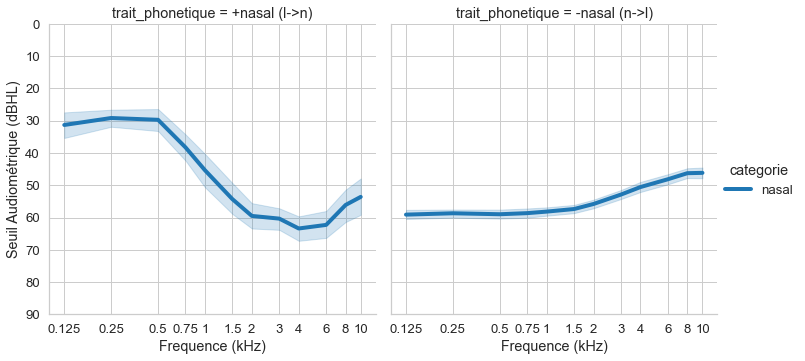

In [236]:
#plt.figure(figsize=(15,16))
ticks=[.125,.25,.5,.75,1,1.5,2,3,4,6,8,10]
labels = [i for i in ticks]
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 4})
g = sns.relplot(
    data=nasal,
    x="frequence", y="seuil", col="trait_phonetique", hue="categorie",
    kind="line")
#g.set(ylim=(90,0))
#g.set(xlim=(0,10000))
g.set_axis_labels("Frequence (kHz)", "Seuil Audiométrique (dBHL)")
g.set(ylim=(90,0),xscale="log",xticks = ticks,xticklabels = labels)
#g.fig.set_figwidth(50)
#g.fig.set_figheight(8)
g.savefig('nasal1.png', dpi=200, bbox_inches='tight')

In [237]:
new.columns

Index(['id_audiogramme', 'phoneme_cible', 'phoneme_reconnu', 'frequence',
       'seuil', 'trait', 'erreur', 'categorie', 'trait_phonetique'],
      dtype='object')

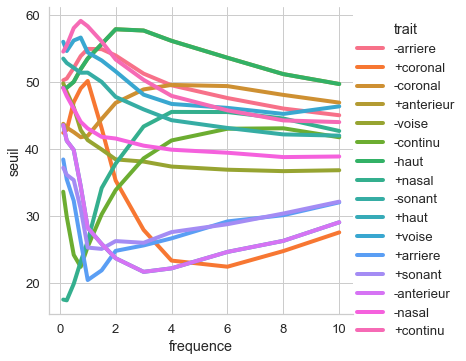

In [239]:
sns.relplot(x="frequence", y="seuil",hue="trait",
            ci=None, kind="line", data=new);

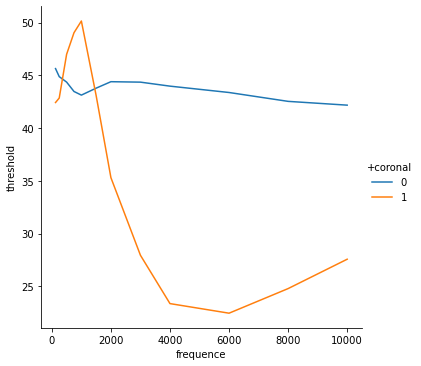

In [151]:
sns.relplot(x="frequence", y="threshold",hue="+coronal",
            ci=None, kind="line", data=df_new);

In [247]:
new.dtypes

id_audiogramme        int64
phoneme_cible        object
phoneme_reconnu      object
frequence           float64
seuil                 int64
trait                object
erreur               object
categorie            object
trait_phonetique     object
dtype: object

In [ ]:
plt.xlabel('Frequency (kHz)') #définition de l'étiquette de l'axe x
plt.ylabel('Threshold (db HL)') #définition de l'étiquette de l'axe y
VF = (' 125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(VF)) #renvoie des valeurs régulièrement espacées dans un intervalle donné
ax = plt.axes() #definir les axes de plot a tracer
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))#changer les axes de plot par pos_list et VF 
ax.xaxis.set_major_formatter(ticker.FixedFormatter((VF)))
plt.plot(data4.iloc[:,0:3])
plt.ylim(95,-2) #limites d'axe y
print(plt.show())

In [115]:
df1.groupby('+voise').mean()

,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000
+voise,,,,,,,,,,,,
0,38.386955,36.860193,36.700790,36.244516,36.702252,36.588184,36.953788,37.497806,37.705469,37.578239,37.195086,37.294531
1,46.003717,46.877323,46.812268,47.927509,48.717472,50.306691,51.765799,51.236059,51.273234,50.204461,48.299257,47.249071


In [116]:
df2.groupby('-voise').mean()

,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,seuil_6000,seuil_8000,seuil_10000
-voise,,,,,,,,,,,,
0,31.201707,31.345463,31.563342,32.441599,34.301438,35.640162,36.960916,38.513028,40.044924,40.334681,39.701258,39.139712
1,49.994223,47.065280,46.450029,44.766031,43.523975,42.071057,41.548238,40.462161,38.913923,37.957828,37.423455,38.015598


In [155]:
df[["seuil_125", "seuil_250", "seuil_250", "seuil_500", "seuil_750", "seuil_1000","seuil_1500","seuil_2000","seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000"]] = df[["seuil_125", "seuil_250", "seuil_250", "seuil_500", "seuil_750", "seuil_1000","seuil_1500","seuil_2000","seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000"]].apply(pd.to_numeric)
df = df.rename({'seuil_125': '125', 'seuil_250': '250','seuil_500': '500','seuil_750': '750','seuil_1000': '1000','seuil_1500': '1500','seuil_2000': '2000','seuil_3000': '3000'
                    ,'seuil_4000': '4000','seuil_6000': '6000','seuil_8000': '8000','seuil_10000': '10000'}, axis=1)

In [157]:
#df.columns = df.iloc[0]
#df=df.drop(df.index[0])
#df=df.iloc[:,2:30]
df.columns

Index(['125', '250', '500', '750', '1000', '1500', '2000', '3000', '4000',
       '6000', '8000', '10000', '+anterieur', '+arriere', '+continu',
       '+coronal', '+haut', '+nasal', '+sonant', '+voise', '-anterieur',
       '-arriere', '-continu', '-coronal', '-haut', '-nasal', '-sonant',
       '-voise'],
      dtype='object', name=0)

In [3]:
df = pd.read_csv('result.csv' , sep=',' , header=None)
df0=df.iloc[:,0:14]
df00=df.iloc[:,14:30]
df0.columns = df0.iloc[0]
df0=df0.drop(df0.index[0])
df0=df0.iloc[:,2:15]
df0
df00.columns = df00.iloc[0]
df00=df00.drop(df00.index[0])
df00
df1=pd.concat([df0, df00.loc[:,'+voise']], axis=1, ignore_index=False)
df2=pd.concat([df0, df00.loc[:,'-voise']], axis=1, ignore_index=False)
df1[["seuil_125", "seuil_250", "seuil_250", "seuil_500", "seuil_750", "seuil_1000","seuil_1500","seuil_2000","seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000"]]= df1[["seuil_125", "seuil_250", "seuil_250", "seuil_500", "seuil_750", "seuil_1000","seuil_1500","seuil_2000","seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000"]].apply(pd.to_numeric)
df2[["seuil_125", "seuil_250", "seuil_250", "seuil_500", "seuil_750", "seuil_1000","seuil_1500","seuil_2000","seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000"]] = df2[["seuil_125", "seuil_250", "seuil_250", "seuil_500", "seuil_750", "seuil_1000","seuil_1500","seuil_2000","seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000"]].apply(pd.to_numeric)
df1 = df1.rename({'seuil_125': '125', 'seuil_250': '250','seuil_500': '500','seuil_750': '750','seuil_1000': '1000','seuil_1500': '1500','seuil_2000': '2000','seuil_3000': '3000'
                    ,'seuil_4000': '4000','seuil_6000': '6000','seuil_8000': '8000','seuil_10000': '10000'}, axis=1)
df3=pd.DataFrame((df1.groupby(['+voise']).mean()).T)
df4=pd.DataFrame((df2.groupby(['-voise']).mean()).T)
df4

-voise,0,1
seuil_125,31.201707,49.994223
seuil_250,31.345463,47.065280
seuil_500,31.563342,46.450029
seuil_750,32.441599,44.766031
seuil_1000,34.301438,43.523975
seuil_1500,35.640162,42.071057
seuil_2000,36.960916,41.548238
seuil_3000,38.513028,40.462161
seuil_4000,40.044924,38.913923
seuil_6000,40.334681,37.957828


In [ ]:
df6=pd.concat([df0, df00.loc[:,'+continu']], axis=1, ignore_index=False)
df6=pd.DataFrame((df6.groupby(['+continu']).mean()).T)
df7=pd.concat([df0, df00.loc[:,'-continu']], axis=1, ignore_index=False)
df7=pd.DataFrame((df7.groupby(['-continu']).mean()).T)
df8=pd.concat([df7.iloc[:,0], df7.iloc[:,1]], axis=1, ignore_index=False)
fig=plt.figure(figsize = (16,5))
plt.xlabel('Frequency (kHz)') #définition de l'étiquette de l'axe x
plt.ylabel('Threshold (db HL)') #définition de l'étiquette de l'axe y
#plt.title('continu- = 1')
VF = (' 125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(VF)) #renvoie des valeurs régulièrement espacées dans un intervalle donné
ax = plt.axes() #definir les axes de plot a tracer
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))#changer les axes de plot par pos_list et VF 
ax.xaxis.set_major_formatter(ticker.FixedFormatter((VF)))
plt.plot(df8.iloc[:,0:2])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [ ]:
fig=plt.figure(figsize = (16,5))
plt.xlabel('Frequency (kHz)') #définition de l'étiquette de l'axe x
plt.ylabel('Threshold (db HL)') #définition de l'étiquette de l'axe y
plt.title('voise+ = 1')
VF = (' 125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(VF)) #renvoie des valeurs régulièrement espacées dans un intervalle donné
ax = plt.axes() #definir les axes de plot a tracer
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))#changer les axes de plot par pos_list et VF 
ax.xaxis.set_major_formatter(ticker.FixedFormatter((VF)))
plt.plot(df3.iloc[:,1])
#plt.ylim(95,-2) #limites d'axe y

In [ ]:
fig=plt.figure(figsize = (16,5))
plt.xlabel('Frequency (kHz)') #définition de l'étiquette de l'axe x
plt.ylabel('Threshold (db HL)') #définition de l'étiquette de l'axe y
plt.title('voise+ = 0')
VF = (' 125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(VF)) #renvoie des valeurs régulièrement espacées dans un intervalle donné
ax = plt.axes() #definir les axes de plot a tracer
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))#changer les axes de plot par pos_list et VF 
ax.xaxis.set_major_formatter(ticker.FixedFormatter((VF)))
plt.plot(df3.iloc[:,0])

In [ ]:
df5=pd.concat([df3.iloc[:,1], df3.iloc[:,0]], axis=1, ignore_index=False)
df5.columns = ['voise+1', 'voise+0']
fig=plt.figure(figsize = (16,5))
plt.xlabel('Frequency (kHz)') #définition de l'étiquette de l'axe x
plt.ylabel('Threshold (db HL)') #définition de l'étiquette de l'axe y
plt.title('voise+ =1 et voise+ =0')
VF = (' 125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(VF)) #renvoie des valeurs régulièrement espacées dans un intervalle donné
ax = plt.axes() #definir les axes de plot a tracer
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))#changer les axes de plot par pos_list et VF 
ax.xaxis.set_major_formatter(ticker.FixedFormatter((VF)))
plt.plot(df5.iloc[:,0:2])

In [ ]:
df = pd.read_csv('result.csv' , sep=',' , header=None)
df.columns = df.iloc[0]
df=df.drop(df.index[0])
df=df.iloc[:,1:30]
df
dataframe0=df[df['-arriere']==0]
dataframe0=pd.concat([dataframe0.iloc[:,1:13], dataframe0.loc[:,'-arriere']], axis=1, ignore_index=False)
dataframe0
dataframe1=pd.concat([dataframe1, dataframe0.groupby(['-arriere']).mean().T], axis=1, ignore_index=False)
dataframe1
dataframe=dataframe0.groupby(['+voise']).mean().T
dataframe
dataframe1=pd.concat([dataframe, dataframe0.groupby(['-voise']).mean().T], axis=1, ignore_index=False)
dataframe1
dataframe1.columns = ['+voise','-voise','+continu','-continu','+anterieur','-anterieur','+coronal','-coronal','+haut', '-haut','+sonant','-sonant', '+nasal','-nasal','+arriere','-arriere']
dataframe1 = dataframe1.rename({'seuil_125': '125', 'seuil_250': '250','seuil_500': '500','seuil_750': '750','seuil_1000': '1000','seuil_1500': '1500','seuil_2000': '2000','seuil_3000': '3000'
                    ,'seuil_4000': '4000','seuil_6000': '6000','seuil_8000': '8000','seuil_10000': '10000'}, axis=0)
dataframe1
dataframe3=pd.DataFrame(dataframe2.stack())
dataframe3.to_csv('dataframe3.csv')
dataframe5=pd.DataFrame(dataframe1.stack())
dataframe5.to_csv('dataframe1.csv')

In [ ]:
dataframe4 = pd.read_csv('dataframe3.csv' , sep=',' , header=None)
dataframe5 = pd.read_csv('dataframe1.csv' , sep=',' , header=None)
dataframe4=dataframe4.drop(dataframe4.index[0])
dataframe5=dataframe5.drop(dataframe5.index[0])
dataframe4.columns = ['seuil','categorie','intensite']
dataframe4.dtypes
dataframe5.columns = ['seuil','categorie','intensite']
dataframe5.dtypes
dataframe4['intensite'] = dataframe4['intensite'].astype(int) 
dataframe4['intensite']=90-dataframe4['intensite']
dataframe4.seuil = pd.to_numeric(dataframe4.seuil, errors='coerce').astype('Int64')
dataframe6=pd.concat([dataframe4, dataframe5.loc[:,'intensite']], axis=1, ignore_index=False)
dataframe6.columns = ['seuil','categorie','intensite1','intensite0']
dataframe6['intensite1-intensite0']=abs(dataframe6['intensite1']-dataframe6['intensite0'])
dataframe4 = dataframe4.rename({'intensite': 'intensite(90-seuil)'}, axis=1)

In [ ]:
plt.figure(figsize=(10, 8))
sns.relplot(x="seuil", y="intensite(90-seuil)", hue="categorie",kind="line",palette = 'hls',data=dataframe4)

In [ ]:
#sns.set(rc={'figure.figsize':(20,10)})
g = sns.FacetGrid(dataframe4,  col="categorie" ,hue='categorie',margin_titles=True,
    col_wrap=3, height=2, aspect=1.5)
g.map(sns.barplot, "seuil", "intensite(90-seuil)")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.relplot(x="seuil", y="intensite1-intensite0", hue="categorie",kind="line",palette = 'hls',data=dataframe6,ci="sd")

In [ ]:
#sns.set(rc={'figure.figsize':(20,10)})
g = sns.FacetGrid(dataframe6,  col="categorie" ,hue='categorie',margin_titles=True,
    col_wrap=3, height=2, aspect=1.5)
g.map(sns.barplot, "seuil", "intensite1-intensite0")
plt.show()

In [ ]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = dataframe6

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print start

end = m + h
print end

In [ ]:
ay=df.iloc[:,13:30]
for column in ay:
    print(ay[column].value_counts())

In [ ]:
# visualize the target variable
g = sns.countplot(df1['+voise'])
plt.show()

In [5]:
df1.dtypes

125        int64
250        int64
500        int64
750        int64
1000       int64
1500       int64
2000       int64
3000       int64
4000       int64
6000       int64
8000       int64
10000      int64
+voise    object
dtype: object

In [59]:
df2

,seuil_125,seuil_250,seuil_500,seuil_750,seuil_1000,seuil_1500,seuil_2000,seuil_3000,seuil_4000,seuil_6000,seuil_8000,seuil_10000,-voise
1,0,0,0,20,30,50,65,75,80,85,60,40,0
2,0,0,0,20,30,50,65,75,80,85,60,40,0
3,0,0,0,20,30,50,65,75,80,85,60,40,0
4,0,0,0,20,30,50,65,75,80,85,60,40,0
5,0,0,0,20,30,50,65,75,80,85,60,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,90,90,90,90,65,45,30,45,20,30,20,15,1
3954,90,90,90,90,65,45,30,45,20,30,20,15,1
3955,90,90,90,90,65,45,30,45,20,30,20,15,1
3956,90,90,90,90,65,45,30,45,20,30,20,15,1


In [60]:
X=df2.iloc[:,0:12]
X
y=df2.loc[:,'-voise']
y

1       0
2       0
3       0
4       0
5       0
       ..
3953    1
3954    1
3955    1
3956    1
3957    1
Name: -voise, Length: 3957, dtype: object

Counter({'0': 1731, '1': 1731})


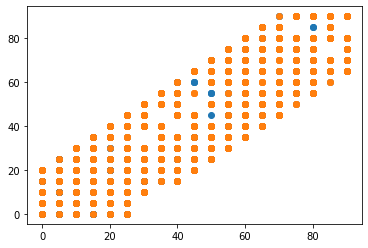

In [61]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))
X_rus1=np.array(X_rus)
y_rus1 = np.array(y_rus)
y_rus1 = y_rus1.astype(int)
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = where(y_rus1 == class_value)
 # create scatter of these samples
 pyplot.scatter(X_rus1[row_ix, 0], X_rus1[row_ix, 1])
# show the plot
pyplot.show()

Counter({'0': 2226, '1': 2226})


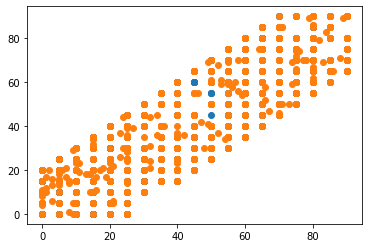

In [62]:
# transform the dataset
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)
X_ros1=np.array(X_ros)
X_ros1
y_ros1 = np.array(y_ros)
y_ros1 = y_ros1.astype(int)
# summarize the new class distribution
counter = Counter(y_ros)
print(counter)
# scatter plot of examples by class label
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = where(y_ros1 == class_value)
 # create scatter of these samples
 pyplot.scatter(X_ros1[row_ix, 0], X_ros1[row_ix, 1])
# show the plot
pyplot.show()

Counter({'0': 2226, '1': 2226})


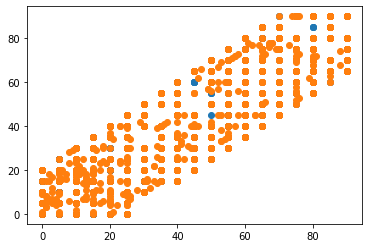

In [63]:
# transform the dataset
oversample = BorderlineSMOTE()
X_smt, y_smt = oversample.fit_resample(X, y)
X_smt1=np.array(X_smt)
X_smt1
y_smt1 = np.array(y_smt)
y_smt1 = y_smt1.astype(int)
# summarize the new class distribution
counter = Counter(y_smt)
print(counter)
# scatter plot of examples by class label
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = where(y_smt1 == class_value)
 # create scatter of these samples
 pyplot.scatter(X_smt1[row_ix, 0], X_smt1[row_ix, 1])
# show the plot
pyplot.show()

Counter({'0': 2226, '1': 2226})


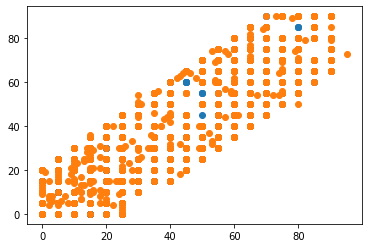

In [64]:
# transform the dataset
oversample = SVMSMOTE()
X_SVMS, y_SVMS = oversample.fit_resample(X, y)
# summarize the new class distribution
X_SVMS1=np.array(X_SVMS)
X_SVMS1
y_SVMS1 = np.array(y_SVMS)
y_SVMS1 = y_SVMS1.astype(int)
# summarize the new class distribution
counter = Counter(y_SVMS)
print(counter)
# scatter plot of examples by class label
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = where(y_SVMS1 == class_value)
 # create scatter of these samples
 pyplot.scatter(X_SVMS1[row_ix, 0], X_SVMS1[row_ix, 1])
# show the plot
pyplot.show()

In [65]:
# Splitting data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2769, 12) (2769,)
(693, 12) (693,)


In [66]:
# pca - keep 90% of variance
pca = PCA(0.90)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)

(2769, 4)


In [55]:
print("Eigenvalues:")
print(pca.explained_variance_)
print()
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("EigenVectors")
print(pca.components_)
pca.explained_variance_ratio_

Eigenvalues:
[5383.62848181 1336.90849942  588.89584616  279.20318369]

Variances (Percentage):
[64.84459305 16.1027619   7.09311789  3.36293949]

EigenVectors
[[ 0.288366    0.29526894  0.32101858  0.33420144  0.32235702  0.3124973
   0.30185356  0.28753868  0.27717039  0.25630619  0.23313157  0.20661188]
 [-0.35238384 -0.3222144  -0.29124823 -0.2229242  -0.14402961 -0.06085828
   0.04078205  0.19497354  0.29439649  0.39180379  0.43083519  0.38413306]
 [ 0.45148011  0.34174877  0.13759154 -0.11131226 -0.26628949 -0.37696479
  -0.39291491 -0.2399489  -0.05106251  0.11058336  0.27028602  0.36768313]
 [-0.38056709 -0.17732826  0.25367341  0.30369782  0.29244689  0.15776257
  -0.1712576  -0.35466787 -0.39080153 -0.1451533   0.19025813  0.43773813]]


array([0.64844593, 0.16102762, 0.07093118, 0.03362939])

In [ ]:
X_pca1=np.array(X_pca)
X_pca1
y_pca1 = np.array(y_rus)
y_pca1 = y_rus.astype(int)
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = where(y_pca1 == class_value)
 # create scatter of these samples
 pyplot.scatter(X_pca1[row_ix, 0], X_pca1[row_ix, 1])
# show the plot
pyplot.show()

[[-63.30546063 -62.22218621  17.65061967  -4.61857663]
 [-55.50516264 -48.58805208  26.82210475 -13.77999627]
 [-39.90304431 -69.59704823 -17.12101672  37.39515055]
 ...
 [ 96.71786464 -37.20670242  -3.27814696 -16.77273115]
 [ 96.71786464 -37.20670242  -3.27814696 -16.77273115]
 [ 49.21939042 -50.90136668  56.28289355  22.07544752]]


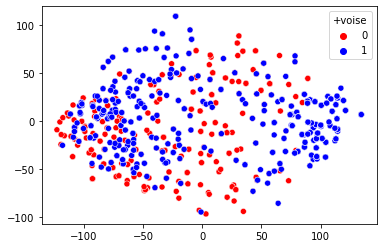

In [57]:
#std = StandardScaler()
#X_std = std.fit_transform(X_train)
X_pca = pca.fit_transform(X_rus)
print(X_pca)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_rus, palette=["red", "blue"])
plt.show()

In [124]:
LR = LogisticRegression()
# fitting the logistic regression model to the training  set
model=LR.fit(X_train, y_train)
# making the prediction of test test set result
y_pred = LR.predict(X_test)
y_pred
# making a confusion metrix
confusion_matric = confusion_matrix(y_test, y_pred)
confusion_matric
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cm=confusion_matric
cm

0.6479076479076479


array([[225, 105],
       [139, 224]])

In [127]:
confusion_matrix(y_test_dr, y_pred_dr)

array([[235, 112],
       [114, 232]])

In [68]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

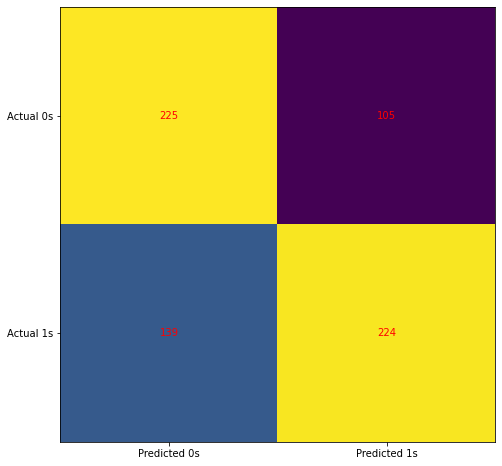

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

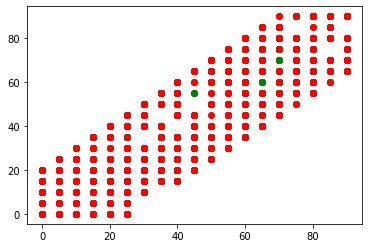

In [130]:
X_train1=np.array(X_train)
y_train1 = np.array(y_train)
y_train1 = y_train1.astype(int)
fig, ax = plt.subplots()
positives = np.where(y_train1 == 1)
negatives = np.where(y_train1 == 0)
ax.scatter(X_train1[positives, 0], X_train1[positives, 1], c='green')
ax.scatter(X_train1[negatives, 0], X_train1[negatives, 1], c='red', linewidth=1)
plt.show()

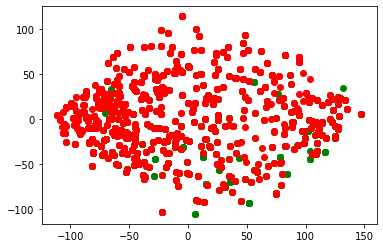

In [129]:
X_train_dr1=np.array(X_train_dr)
y_train_dr1 = np.array(y_train_dr)
y_train_dr1 = y_train_dr1.astype(int)
fig, ax = plt.subplots()
positives = np.where(y_train_dr1 == 1)
negatives = np.where(y_train_dr1 == 0)
ax.scatter(X_train_dr1[positives, 0], X_train_dr1[positives, 1], c='green')
ax.scatter(X_train_dr1[negatives, 0], X_train_dr1[negatives, 1], c='red', linewidth=1)
plt.show()

Accuracy : 0.6738816738816739


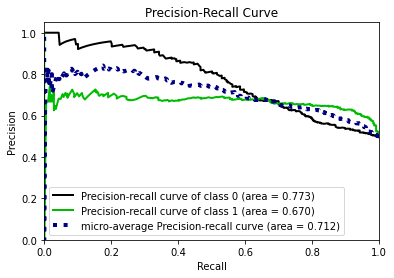

In [125]:
pca = PCA(0.90)
X_lin_pca = pca.fit_transform(X_rus)
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_lin_pca, y_rus, test_size=0.2)
LR.fit(X_train_dr, y_train_dr)
y_pred_dr = LR.predict(X_test_dr)
acc_dr = accuracy_score(y_test_dr, y_pred_dr)
print('Accuracy : {}'.format(acc_dr))
y_pred_proba = LR.predict_proba(X_test_dr)
skplt.metrics.plot_precision_recall(y_test_dr, y_pred_proba)
plt.show()
confusion_matrix(y_test_dr, y_pred_dr)

In [72]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [73]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6002886002886003


array([[211, 119],
       [158, 205]])

In [132]:
pca = PCA(0.90)
X_lin_pca = pca.fit_transform(X_rus)
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_lin_pca, y_rus, test_size=0.2)
decision_tree.fit(X_train_dr, y_train_dr)
y_pred_dr = decision_tree.predict(X_test_dr)
acc_dr = accuracy_score(y_test_dr, y_pred_dr)
print('Accuracy : {}'.format(acc_dr))
confusion_matrix(y_test_dr, y_pred_dr)

Accuracy : 0.5988455988455988


array([[208, 150],
       [128, 207]])

In [74]:
SVM = svm.SVC(kernel='linear')

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [38]:
clf=SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6712962962962963


array([[81, 29],
       [42, 64]])

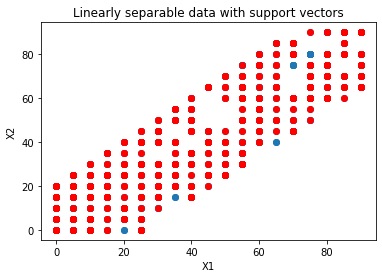

In [40]:
support_vector_indices = clf.support_
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
X_train=np.array(X_train)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [133]:
pca = PCA(0.90)
X_lin_pca = pca.fit_transform(X_rus)
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_lin_pca, y_rus, test_size=0.2)
SVM.fit(X_train_dr, y_train_dr)
y_pred_dr = SVM.predict(X_test_dr)
acc_dr = accuracy_score(y_test_dr, y_pred_dr)
print('Accuracy : {}'.format(acc_dr))
confusion_matrix(y_test_dr, y_pred_dr)

Accuracy : 0.6594516594516594


array([[261, 117],
       [119, 196]])

In [135]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [136]:
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6507936507936508


array([[225, 105],
       [137, 226]])

IndexError: index 1 is out of bounds for axis 1 with size 1

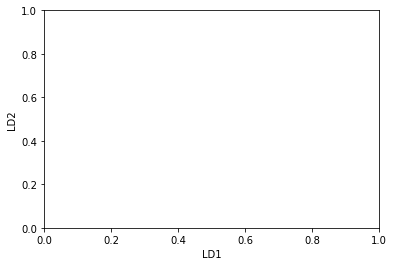

In [137]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_rus,y_rus)
lda.explained_variance_ratio_
X_lda=np.array(X_lda)
X_lda
y_rus1 = np.array(y_rus)
y_rus1 = y_rus1.astype(int)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_rus1,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lda, y_rus, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train1, y_train1)
y_pred1 = dt.predict(X_test1)
accuracy_score(y_test1, y_pred1)
confusion_matrix(y_test1, y_pred1)
y_pred1_proba = dt.predict_proba(X_test1)
skplt.metrics.plot_precision_recall(y_test1, y_pred1_proba)
plt.show()

In [138]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [139]:
QDA.fit(X_train, y_train)
y_pred = QDA.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6507936507936508


array([[216, 114],
       [128, 235]])

In [140]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [141]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6219336219336219


array([[192, 138],
       [124, 239]])

In [142]:
pca = PCA(0.90)
X_lin_pca = pca.fit_transform(X_rus)
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_lin_pca, y_rus, test_size=0.2)
random_forest.fit(X_train_dr, y_train_dr)
y_pred_dr = random_forest.predict(X_test_dr)
acc_dr = accuracy_score(y_test_dr, y_pred_dr)
print('Accuracy : {}'.format(acc_dr))
confusion_matrix(y_test_dr, y_pred_dr)

Accuracy : 0.6046176046176046


array([[171, 172],
       [102, 248]])

In [143]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [144]:
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6320346320346321


array([[198, 132],
       [123, 240]])

In [145]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [146]:
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))
confusion_matrix(y_test, y_pred)

Accuracy : 0.6046176046176046


array([[222, 108],
       [166, 197]])

In [147]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
4,Quadratic Discriminant Analysis,0.009270,0.012828,0.666276,0.668443,0.666496,0.665347,0.712075
2,Support Vector Machine,46.956155,0.021899,0.663721,0.665594,0.663524,0.662860,0.723500
0,Logistic Regression,0.039664,0.009835,0.661917,0.664215,0.661670,0.660882,0.722320
3,Linear Discriminant Analysis,0.015274,0.011508,0.661195,0.663145,0.660904,0.660243,0.722117
7,Bayes,0.007791,0.012065,0.631947,0.635342,0.630944,0.629058,0.694432
5,Random Forest,0.402186,0.036705,0.628321,0.630495,0.628859,0.627126,0.648130
1,Decision Tree,0.016738,0.011288,0.620381,0.621166,0.620243,0.619722,0.643991
6,K-Nearest Neighbors,0.008310,0.022818,0.613531,0.615416,0.613848,0.611998,0.647152


Feature: 0, Score: 0.02441
Feature: 1, Score: -0.00374
Feature: 2, Score: 0.00989
Feature: 3, Score: 0.00861
Feature: 4, Score: -0.00045
Feature: 5, Score: -0.00598
Feature: 6, Score: -0.00136
Feature: 7, Score: 0.00767
Feature: 8, Score: -0.01218
Feature: 9, Score: -0.00724
Feature: 10, Score: -0.00146
Feature: 11, Score: 0.00267


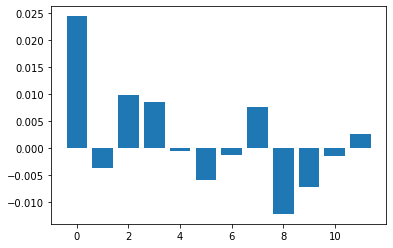

In [148]:
model = LogisticRegression()
# fit the model
model.fit(X_rus, y_rus)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.52471
Feature: 1, Score: 0.02646
Feature: 2, Score: 0.08209
Feature: 3, Score: 0.03410
Feature: 4, Score: 0.03750
Feature: 5, Score: 0.03440
Feature: 6, Score: 0.06937
Feature: 7, Score: 0.04711
Feature: 8, Score: 0.07698
Feature: 9, Score: 0.01883
Feature: 10, Score: 0.01817
Feature: 11, Score: 0.03028


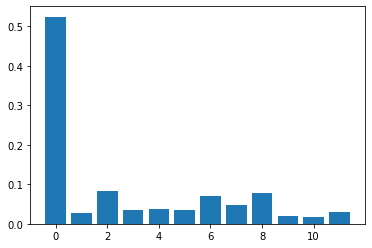

In [149]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X_rus, y_rus)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#lin_pca = KernelPCA(n_components=4, kernel='linear', gamma=0.03)
#X_reduced_kernel_lin = lin_pca.fit_transform(X_rus)

In [89]:
new.loc[new["trait"] == "+voise", 'exemple'] = "+voise (S->Z)"
new.loc[new["trait"] == "-voise", 'exemple'] = "-voise (Z->S)"
new.loc[new["trait"] == "+coronal", 'exemple'] = "+coronal (b->d)"
new.loc[new["trait"] == "-coronal", 'exemple'] = "-coronal (d->b)"
new.loc[new["trait"] == "+continu", 'exemple'] = "+continu (b->v)"
new.loc[new["trait"] == "-continu", 'exemple'] = "-continu (f->p)"
new.loc[new["trait"] == "+nasal", 'exemple'] = "+nasal (l->n)"
new.loc[new["trait"] == "-nasal", 'exemple'] = "-nasal (n->l)"
new.loc[new["trait"] == "+sonant", 'exemple'] = "+sonant ['+continu'] (d->l)"
new.loc[new["trait"] == "-sonant", 'exemple'] = "-sonant  (l->Z)"
new.loc[new["trait"] == "+haut", 'exemple'] = "+haut ['+arriere,-anterieur'] (b->g)"
new.loc[new["trait"] == "-haut", 'exemple'] = "-haut ['+anterieur'] (S->s)"
new.loc[new["trait"] == "+anterieur", 'exemple'] = "+anterieur ['-haut,+voise'] (S->z)"
new.loc[new["trait"] == "-anterieur", 'exemple'] = "-anterieur ['+haut,+continu'] (d->Z)"
new.loc[new["trait"] == "+arriere", 'exemple'] = "+arriere ['-coronal,-continu'] (S->k)"
new.loc[new["trait"] == "-arriere", 'exemple'] = "-arriere ['+continu,+coronal'] (g->Z)"

In [90]:
new

,id_audiogramme,phoneme_cible,phoneme_reconnu,frequence,threshold,trait,error,category,exemple
818519,912,n,k,10.0,35,-anterieur,nk,anterieur,"-anterieur ['+haut,+continu'] (d->Z)"
327589,450,f,k,0.5,40,-anterieur,fk,anterieur,"-anterieur ['+haut,+continu'] (d->Z)"
327613,453,g,p,0.5,25,+anterieur,gp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
327612,453,S,p,0.5,25,+anterieur,Sp,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
327593,451,Z,n,0.5,40,+anterieur,Zn,anterieur,"+anterieur ['-haut,+voise'] (S->z)"
...,...,...,...,...,...,...,...,...,...
201535,684,p,v,10.0,45,+voise,pv,voise,+voise (S->Z)
253611,769,k,R,1.5,35,+voise,kR,voise,+voise (S->Z)
201534,684,n,f,10.0,45,-voise,nf,voise,-voise (Z->S)
201600,691,m,f,10.0,15,-voise,mf,voise,-voise (Z->S)
